In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
from scipy.stats import shapiro

# Regression Model Quiz

This quiz is part of Algoritma Academy assessment process. Congratulations on completing the Regression Model course! We will conduct an assessment quiz to test the practical regression model techniques that you have learned on the course. The quiz is expected to be taken in the classroom, please contact our team of instructors if you missed the chance to take it in class.

## Data Exploration

In this quiz, you will be using the **criminologist** dataset (`crime_train.csv`) to build a linear regression models. You can run the following chunk to make sure we are using the same dataset:

In [3]:
crime = pd.read_csv("data_input/crime_train.csv")
crime

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
0,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
1,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
2,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
3,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
4,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
5,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682
6,127,1,111,82,79,519,982,4,139,97,38,620,168,0.042100,20.6993,963
7,131,1,109,115,109,542,969,50,179,79,35,472,206,0.040099,24.5988,1555
8,157,1,90,65,62,553,955,39,286,81,28,421,239,0.071697,29.4001,856
9,140,0,118,71,68,632,1029,7,15,100,24,526,174,0.044498,19.5994,705


Among all variables within our `crime` dataset, there is a `crime_rate` variable that describes the measure of crime rate for each State within the United States in 1960. Imagine you are working as a government analyst and would like to see how social-economic conditions could reflect on the crime rate of a State. Recall how we can inspect the correlation for each variable using `.corr()`. Try it out on your own and see what are the possible predictor variables for our `crime_rate` variable.

In [4]:
##code here
crime.corr()


,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
percent_m,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
is_south,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
mean_education,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
police_exp60,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
police_exp59,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
labour_participation,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
m_per1000f,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
state_pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
nonwhites_per1000,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
unemploy_m24,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


Or in another way, we can visualize it using heatmap correlation on `seabron` by complete the following code below :

Text(0.5, 1.0, 'Correlation Heatmap')

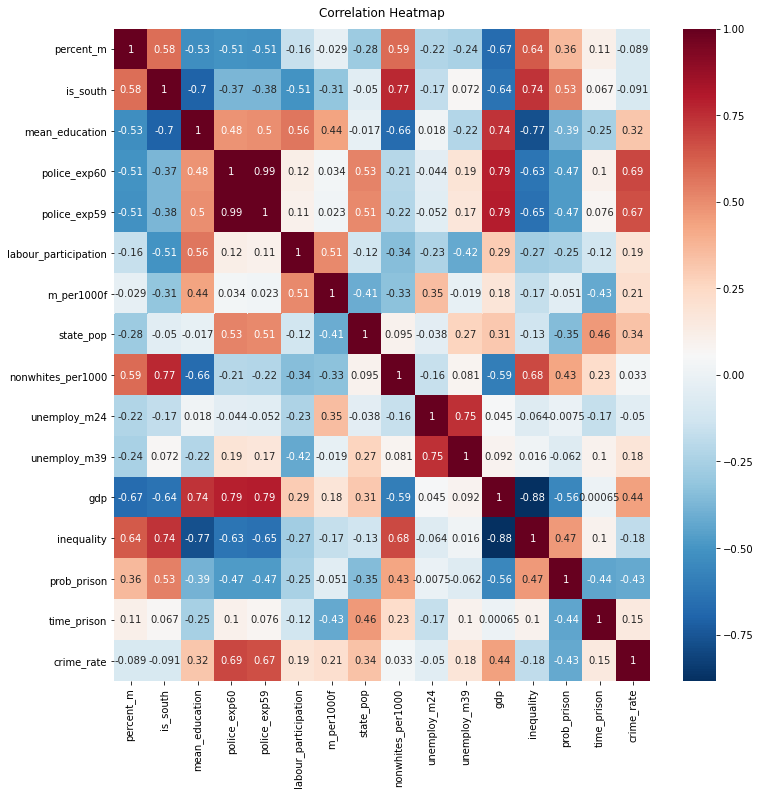

In [6]:
plt.subplots(figsize=(12,12)) 
heatmap = sns.heatmap(crime.corr(), cmap='RdBu_r',annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Based on the result, you will know how each variable correlates with the `crime_rate` variable. Referring to that result, we can perform a preliminary variable selection to select suitable predictor variables.

1. Which variable has little to no correlation with our `crime_rate` variable and might not be suitable as a predictor?
  - [ ] crime_rate
  - [ ] police_exp59
  - [ ] unemploy_m39
  - [x] nonwhites_per1000


## Building Simple Linear Regression    

From the data exploration process, it is known that not all variables show a strong correlation with the `crime_rate` variable. Let’s try to build a simple linear model using one of the highly correlated variables: `police_exp59`. Create a regression model using to predict `crime_rate` using `police_exp59` from our dataset and assign it to an object named `model_crime`. Check the summary of that model.

In [7]:
## code here
# define predictor variable
X_data = crime['police_exp59']
X_data = sm.add_constant(X_data)

#define target variable
Y_data = crime['crime_rate']

# build model with outlier
model_crime = sm.OLS(Y_data, X_data).fit()

model_crime.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     36.01
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           3.11e-07
Time:                        22:18:56   Log-Likelihood:                -332.39
No. Observations:                  47   AIC:                             668.8
Df Residuals:                      45   BIC:                             672.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          165.1642    130.427      1.266      0.212     -97.529     427.858
police_exp59     9.2220      1.537      6.001      0.000       6.127      12.317
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.359
Skew:                          -0.173   Prob(JB):                        0.836
Kurtosis:                       2.749   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

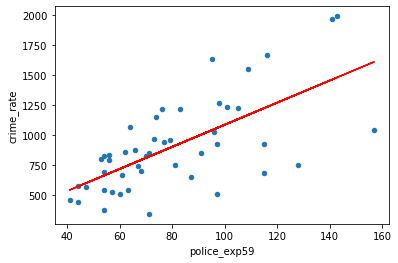

In [10]:
crime.plot.scatter(x='police_exp59', y='crime_rate')
plt.plot(crime['police_exp59'], model_crime.fittedvalues, c='red')
plt.show()

2. Which of the following best describes the slope?
  - [ ] It's a negative slope, and is statistically insignificant (P-value higher than 0.05)
  - [x] It's a positive slope, and is statistically significant (P-value lower than 0.05)
  - [ ] It's a positive slope, and is statistically insignificant (P-value higher than 0.05)
  - [ ] It's a negative slope, and is statistically significant (P-value lower than 0.05)

3. What is the most fitting conclusion from the regression model above?
  - [ ] The R-squared does not tell us about the quality of our model fit, we should use p-value instead
  - [ ] The R-squared approximates 0.44, indicating a reasonable fit (the closer to 0 the better)
  - [x] The R-squared approximates 0.44, indicating a poor fit (the closer to 1 the better)

## Building Multiple Linear Regression    

The R-squared of `model_crime` approximates 0.44, which ideally needs to be improved upon, for example, by adding more predictor variables. Change old variable and add some new, including : `percent_m`,`mean_education`,`police_exp60`,`m_per1000f`,`unemploy_m24`,`unemploy_m39`,`inequality`, and `prob_prison`. Assign it to an object named `model_crime_update`. 

In [15]:
crime_new = crime[['crime_rate', 'percent_m', 'mean_education', 'police_exp60', 'm_per1000f', 'unemploy_m24', 'unemploy_m39', 'inequality', 'prob_prison']]

In [18]:
## code here
## code here
# define predictor variable
X_data_update = sm.add_constant(crime_new.drop('crime_rate', axis=1))

#define target variable
Y_data_update = crime_new['crime_rate']

# build model with outlier
model_crime_update = sm.OLS(Y_data_update, X_data_update).fit()

model_crime_update.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     17.74
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.16e-10
Time:                        22:55:18   Log-Likelihood:                -309.66
No. Observations:                  47   AIC:                             637.3
Df Residuals:                      38   BIC:                             654.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6426.1010   1194.611     -5.379      0.000   -8844.464   -4007.738
percent_m          9.3322      3.350      2.786      0.008       2.551      16.113
mean_education    18.0120      5.275      3.414      0.002       7.333      28.691
police_exp60      10.2653      1.552      6.613      0.000       7.123      13.408
m_per1000f         2.2340      1.360      1.642      0.109      -0.519       4.987
unemploy_m24      -6.0866      3.339     -1.823      0.076     -12.847       0.673
unemploy_m39      18.7345      7.248      2.585      0.014       4.061      33.408
inequality         6.1335      1.396      4.394      0.000       3.308       8.959
prob_prison    -3796.0318   1490.646     -2.547      0.015   -6813.688    -778.376
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.238
Skew:                          -0.104   Prob(JB):                        0.888
Kurtosis:                       3.280   Cond. No.                     5.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Based on the summary of your final model, which statement is **incorrect**?
  - [ ] An increase of 1 of police_exp60 causes the value of crime_rate to increase by 10,265
  - [ ] An increase of 1 of unemploy_m24 causes the crime_rate to decrease by 6,087
  - [ ] An increase of 1 of mean_education causes the value of crime_rate to decrease by 18.01
  - [x] Adjusted R-squared is a better metrics for evaluating our model compared to Multiple R-squared

## Shapiro test for Normality test

One of the assumptions for linear regression stated that the error obtained from the model must be distributed normally around the mean of 0. You will need to validate our normality assumption from `model_crime_update` using `shapiro()` function. This function requires us to pass in the residuals of our model.

In [20]:
## code here
pd.DataFrame({
    'Prediction': model_crime_update.fittedvalues,
    'Actual': crime_new['crime_rate'],
    'Residual': model_crime_update.resid
}).head()

,Prediction,Actual,Residual
0,730.260323,791,60.739677
1,1429.529038,1635,205.470962
2,391.670686,578,186.329314
3,1846.750070,1969,122.249930
4,1119.453316,1234,114.546684


<AxesSubplot:>

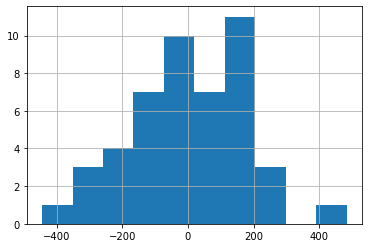

In [21]:
model_crime_update.resid.hist()

In [24]:
from scipy.stats import shapiro

shapiro(model_crime_update.resid)

ShapiroResult(statistic=0.9851073026657104, pvalue=0.8050770163536072)

For your reference, Shapiro testing use the following hypotheses:

$H_0$ : Error is distributed normally  

$H_1$ : Error is not distributed normally  

5. Based on the Shapiro test you have performed, what conclusion can be drawn from the result?
  - [x] Error is distributed normally (P-value higher than 0.05) 
  - [ ] Error is distributed normally (P-value lower than 0.05) 
  - [ ] Error is not distributed normally (P-value higher than 0.05) 
  - [ ] Error is not distributed normally (P-value lower than 0.05) 

## Predicting Unseen Data

Imagine you were given a new dataset that records the same socio-economic variables from different observations. The data is stored under `crime_test.csv`, please read the data and store it under an object named `crime_test`. Next, predict the crime rate for that new data using `model_crime_update`. You can store your prediction under a new column named `crime_rate_predict` in the `crime_test` data.

In [35]:
crime_test = pd.read_csv("data_input/crime_test.csv")
crime_test.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
0,123,0,102,97,87,526,948,113,76,124,50,572,158,0.020700,37.4011,653
1,177,1,87,58,56,638,974,24,349,76,28,382,254,0.045198,31.6995,831
2,152,1,87,57,53,530,986,30,72,92,43,405,264,0.069100,22.7008,798
3,124,0,105,121,116,580,966,101,106,77,35,657,170,0.016201,41.6000,1674
4,148,0,122,72,66,601,998,9,19,84,20,590,144,0.025100,30.0001,880


In [70]:
X_new = sm.add_constant(crime_test['police_exp59'])

crime_test['crime_rate_predict'] = model_crime.predict(X_new)
crime_test.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate,crime_rate_predict,Error
0,123,0,102,97,87,526,948,113,76,124,50,572,158,0.020700,37.4011,653,967.480979,-406.701293
1,177,1,87,58,56,638,974,24,349,76,28,382,254,0.045198,31.6995,831,681.598003,130.957934
2,152,1,87,57,53,530,986,30,72,92,43,405,264,0.069100,22.7008,798,653.931909,107.179965
3,124,0,105,121,116,580,966,101,106,77,35,657,170,0.016201,41.6000,1674,1234.919891,392.969951
4,148,0,122,72,66,601,998,9,19,84,20,590,144,0.025100,30.0001,880,773.818318,50.849493


Now, pay attention to the `crime_test` data. Among the variables, you should see a `crime_rate` column describing the real crime rate for each observation, whilst `crime_rate_predict` is the result from model prediction. Within the workshop, you have learned some metrics to evaluate our model performance. Try to calculate the Mean Absolute Error (`MAE`) of our `model_crime_update` prediction. You can use the `meanabs` function from `statsmodels` library by passing in `crime_test['crime_rate']` as actual data and `crime_test['crime_rate_predict']` as prediction data on parameter.

In [38]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
import math

In [71]:
crime_test['Error'] = crime_test['crime_rate'] - crime_test['crime_rate_predict']
crime_test.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate,crime_rate_predict,Error
0,123,0,102,97,87,526,948,113,76,124,50,572,158,0.020700,37.4011,653,967.480979,-314.480979
1,177,1,87,58,56,638,974,24,349,76,28,382,254,0.045198,31.6995,831,681.598003,149.401997
2,152,1,87,57,53,530,986,30,72,92,43,405,264,0.069100,22.7008,798,653.931909,144.068091
3,124,0,105,121,116,580,966,101,106,77,35,657,170,0.016201,41.6000,1674,1234.919891,439.080109
4,148,0,122,72,66,601,998,9,19,84,20,590,144,0.025100,30.0001,880,773.818318,106.181682


In [72]:
crime_test['Error'].abs().mean()

206.46558511457874

In [73]:
## code here
##code here
meanabs(crime_test['crime_rate'], crime_test['crime_rate_predict'])


206.46558511457874

In [74]:
math.sqrt((crime_test['Error']**2).mean())

234.5798438314672

In [75]:
rmse(crime_test['crime_rate'], crime_test['crime_rate_predict'])

234.5798438314672

6. What is the MAE value of the crime_test prediction? (round to two decimal points)    
  - [ ] 182.56
  - [ ] 180.73
  - [ ] 172.59
